<h1>**Logistic Regression on German Credit Risk data set**</h1>

# Tables of Content:

**1. [Introduction](#Intro_log)** <br>
    - Information about the data set <br>
**2. [Reason for using this model](#reasons_log)** <br>
    - The purpose of this specific model <br>
**3. [Libraries](#libraries_log)** <br>
    - Importing Libraries <br>
    - Importing Dataset <br>
**4. [Preprocess](#preprocessing_log)** <br>
    - 4.1 Separating feature and target variables <br>
    - 4.2 [Feature Selection](#feature_selection_log)<br>
    - 4.3 [Spliting the X and Y in train and test](#split_log)<br>
**5. [Models](#modelling_log)**<br>
    - 5.1 [Logistic Regression: Vanilla, Lasso and Ridge]<br>
    - 5.2 [Metrics](#metrics_log)<br>
    - 5.3 [Confusion Matrix and Classification Report](#conmat_log)<br>
    - 5.4 ROC curve and Precision-Recall curve <br>
**6. [Conclusion and Benefits of the model](#summary_log)** <br>
    The summary of the model implementation

<a id="Intro_log"></a> <br>
# **1. Introduction:** 
<h2>Context</h2>
The original dataset contains 1000 entries with 9 feature variables. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

<h2>Content</h2>
I have cleaned and preprocessed the data already and also I have created a more relevant feature from two of the most important feature in the data set i.e. Credit amount and Duration. The preprocessed data set is already saved in a CSV file and we are going to use that file for our model training and testing purposes. The selected variables from the orginal data set are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric, in DM - Deutsch Mark)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<a id="reasons_log"></a> <br>
# **2. Reason for using this model**
<h2>Our goal is to: </h2>

- Implement Logistic Regression with vanilla, l1 and l2 penalty.
- Assessment of number of features vs. Accuracy and choosing the right no. of features for our model.
- Impact on the coefficient of hypothesis because of lasso and ridge regression.
- Assess the different metrics on these different implementation of Logistic Regression.
- Evaluate False Positive Rate (FPR) on these models using Confusion Matrix.
- Visualize Receiver Operating Characteristics (ROC) curve and Precision-Recall curve to see the trend.

<a id="libraries_log"></a> <br>
# **3. Libraries**

### Imports

In [1]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

from scipy import stats 
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from colorsetup import colors, palette

### Read the data

In [2]:
gcr_data = pd.read_csv("gcr_data_imputed2.csv")
#gcr_data = pd.read_csv("gcr_data_imputed.csv")
#gcr_data = pd.read_csv("gcr_processed.csv")

In [3]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0


In [4]:
gcr_data['Credit_amount/duration'] = gcr_data['Credit amount']/gcr_data['Duration']

In [5]:
gcr_data.head()

,Age,Sex,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk,Credit_amount/duration
0,4.219508,0.693147,2,7.064759,1.945910,0.0000,0.6934,0.0,0,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,1,3.630568
1,3.135494,0.000000,2,8.691483,3.891820,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.0000,0.6934,0.0,0.0,0,2.233269
2,3.912023,0.693147,1,7.648263,2.564949,0.0000,0.6934,0.0,1,0.0,...,0.0,0,0.0,0.6934,0.0000,0.0000,0.0,0.0,1,2.981838
3,3.828641,0.693147,2,8.972464,3.761200,0.6934,0.0000,0.0,1,0.0,...,0.0,0,0.0,0.0000,0.6934,0.0000,0.0,0.0,1,2.385532
4,3.988984,0.693147,2,8.491055,3.218876,0.6934,0.0000,0.0,1,0.0,...,0.0,1,0.0,0.0000,0.0000,0.0000,0.0,0.0,0,2.637894


<a id="preprocessing_log"></a> <br>
# **4. Preprocess**

<h2>4.1 Separating feature and target</h2>

In [6]:
#X = gcr_data.drop(['Risk','Credit_amount/duration'], axis=1)
X = gcr_data.drop(['Risk', 'Credit amount'], axis=1)
#X = gcr_data.drop(['Risk'], axis=1)

y = gcr_data['Risk']

In [7]:
X.shape[1]

23

<a id="feature_selection_log"></a>
<h2>4.2 Feature Selection</h2>

### 1. Univariate Selection

In [8]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [9]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print best features

                         Specs      Score
11     Checking account_little  33.595555
7       Saving accounts_little  10.291479
12   Checking account_moderate   7.248111
19            Purpose_radio/TV   5.707578
6                 Housing_rent   4.901023
10        Saving accounts_rich   4.853800
3                     Duration   4.699713
4                 Housing_free   4.113929
5                  Housing_own   3.604819
9   Saving accounts_quite rich   3.270982


In [10]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = LogisticRegression()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[featureScores.nlargest(i, 'Score')['Specs']], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.696 (0.020)
> 2) 0.699 (0.032)
> 3) 0.690 (0.022)
> 4) 0.706 (0.043)
> 5) 0.695 (0.028)
> 6) 0.696 (0.031)
> 7) 0.732 (0.036)
> 8) 0.734 (0.039)
> 9) 0.734 (0.037)
> 10) 0.733 (0.037)
> 11) 0.737 (0.037)
> 12) 0.733 (0.036)
> 13) 0.734 (0.036)
> 14) 0.738 (0.040)
> 15) 0.739 (0.039)
> 16) 0.740 (0.040)
> 17) 0.741 (0.039)
> 18) 0.742 (0.038)
> 19) 0.742 (0.038)
> 20) 0.740 (0.038)
> 21) 0.739 (0.039)
> 22) 0.736 (0.040)
> 23) 0.735 (0.040)


In [11]:
#X = gcr_data[featureScores.nlargest(23, 'Score')['Specs'].values]

### 2. Feature Importance

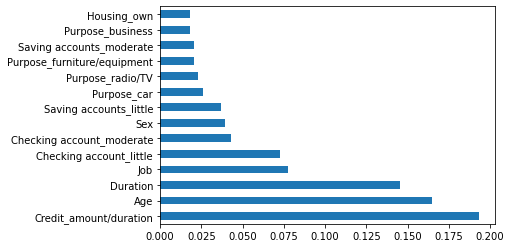

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model_fi = ExtraTreesClassifier()
model_fi.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).nlargest(14).plot(kind='barh')
plt.show()

In [13]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

model_eval = LogisticRegression()

results = list()
for i in range(1,X.shape[1]+1):
        scores = evaluate_model(model_eval, X[feat_importances.nlargest(i).index], y)
        results.append(scores)
        print('> %s) %.3f (%.3f)' % (i, mean(scores), std(scores)))

> 1) 0.700 (0.002)
> 2) 0.702 (0.009)
> 3) 0.703 (0.018)
> 4) 0.703 (0.018)
> 5) 0.723 (0.028)
> 6) 0.725 (0.032)
> 7) 0.722 (0.035)
> 8) 0.741 (0.036)
> 9) 0.741 (0.037)
> 10) 0.739 (0.040)
> 11) 0.743 (0.040)
> 12) 0.741 (0.041)
> 13) 0.741 (0.041)
> 14) 0.742 (0.039)
> 15) 0.740 (0.038)
> 16) 0.739 (0.039)
> 17) 0.738 (0.041)
> 18) 0.738 (0.041)
> 19) 0.737 (0.041)
> 20) 0.737 (0.040)
> 21) 0.736 (0.040)
> 22) 0.736 (0.040)
> 23) 0.735 (0.040)


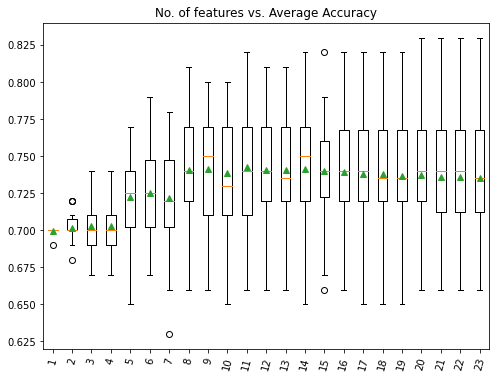

In [14]:
no_of_features = [str(i) for i in range(1,X.shape[1]+1)]
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=no_of_features, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

### 3. Correlation Matrix with Heatmap

### 4. RFE

In [15]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = LogisticRegression()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = LogisticRegression()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = LogisticRegression()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [16]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.732 (0.030)
>per 0.718 (0.033)
>cart 0.724 (0.029)
>rf 0.726 (0.027)
>gbm 0.726 (0.028)


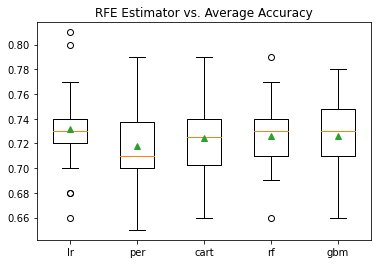

In [17]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('RFE Estimator vs. Average Accuracy')
plt.show()

In [18]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, X.shape[1]+1):
        rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
        model = LogisticRegression()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('> %s) %.3f (%.3f)' % (name, mean(scores), std(scores)))

> 2) 0.700 (0.000)
> 3) 0.710 (0.028)
> 4) 0.718 (0.035)
> 5) 0.725 (0.039)
> 6) 0.728 (0.039)
> 7) 0.728 (0.034)
> 8) 0.732 (0.042)
> 9) 0.732 (0.044)
> 10) 0.732 (0.042)
> 11) 0.737 (0.037)
> 12) 0.738 (0.038)
> 13) 0.741 (0.037)
> 14) 0.739 (0.038)
> 15) 0.738 (0.039)
> 16) 0.739 (0.039)
> 17) 0.739 (0.040)
> 18) 0.739 (0.041)
> 19) 0.738 (0.041)
> 20) 0.737 (0.042)
> 21) 0.737 (0.041)
> 22) 0.736 (0.040)
> 23) 0.735 (0.040)


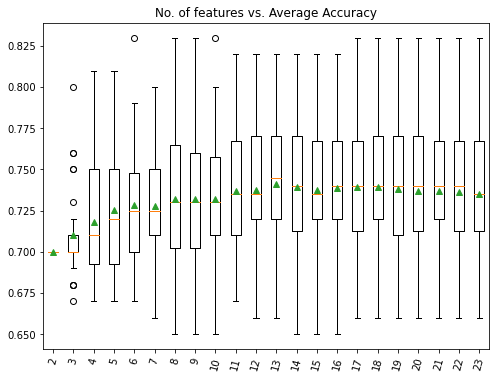

In [19]:
# plot model performance for comparison
plt.figure(figsize=(8,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=75)
plt.title('No. of features vs. Average Accuracy')
plt.show()

#### Suppressing any warnings

In [20]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [21]:
# define RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=13)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 9.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 6.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 10.000
Column: 15, Selected False, Rank: 11.000
Column: 16, Selected False, Rank: 8.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 4.000
Column: 21, Selected False, Rank: 5.000
Column: 22, Selected True, Rank: 1.000


<a id="split_log"></a>
<h2>4.3 StratifiedShuffleSplit</h2>

In [48]:
X = gcr_data[feat_importances.nlargest(14).index]
#X = gcr_data[X.columns[rfe.support_]]
#X = gcr_data[featureScores.nlargest(2, 'Score')['Specs']]

#X.head()

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=10, 
                                          test_size=0.25, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, gcr_data.Risk))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = gcr_data.loc[train_idx, 'Risk']

X_test  = X.loc[test_idx, X.columns]
y_test  = gcr_data.loc[test_idx, 'Risk']

<a id="modelling_log"></a> <br>
# **5. Models**

<a id="models"></a>
<h2>5.1 Logistic Regression: Vanilla, L1 and L2</h2>

In [50]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [51]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [52]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

<a id="metrics_log"></a>
<h2>5.2 Metrics</h2>

In [53]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1]], 
                                 codes=[[0], [0]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

#coefficients.sample(5)

y_pred = list()
y_prob = list()


for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#y_pred.head()

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,lr,l1,l2
precision,0.746341,0.746487,0.756386
recall,0.760000,0.756000,0.764000
fscore,0.739474,0.722903,0.734371
accuracy,0.760000,0.756000,0.764000
auc,0.657143,0.631429,0.644762


<a id="conmat_log"></a>
<h2>5.3 Confusion Matrix and Classification Report</h2>

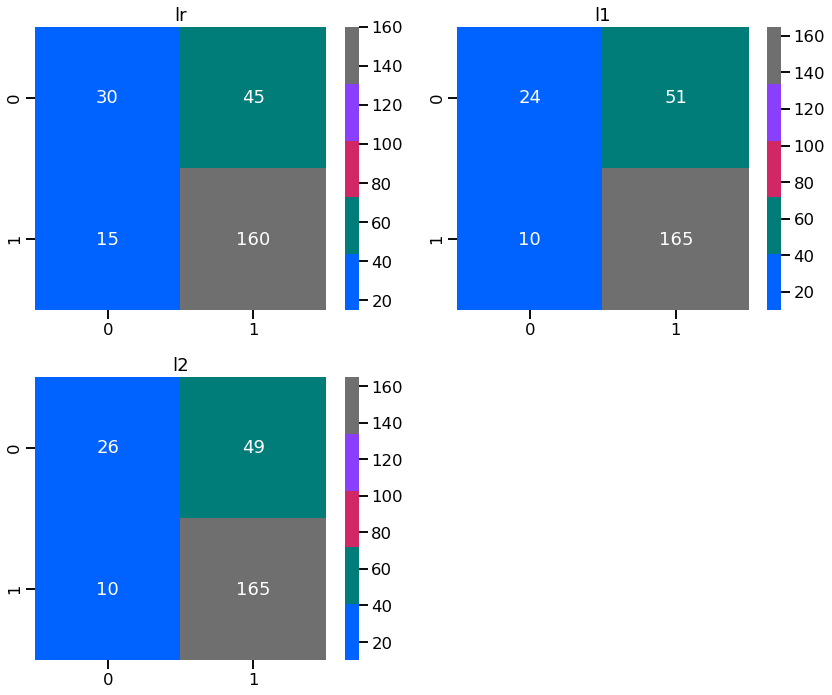

In [54]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()

Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

In [55]:
y_pred_lr = lr.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_lr))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr), 3))

print('\n')
print('#'*60)

y_pred_lr_l1 = lr_l1.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_lr_l1))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr_l1), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr_l1), 3))

print('\n')
print('#'*60)

y_pred_lr_l2 = lr_l2.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred_lr_l2))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred_lr_l2), 3))
print('F1 Score: ', round(f1_score(y_test, y_pred_lr_l2), 3))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        75
           1       0.78      0.91      0.84       175

    accuracy                           0.76       250
   macro avg       0.72      0.66      0.67       250
weighted avg       0.75      0.76      0.74       250

Accuracy score:  0.76
F1 Score:  0.842


############################################################
              precision    recall  f1-score   support

           0       0.71      0.32      0.44        75
           1       0.76      0.94      0.84       175

    accuracy                           0.76       250
   macro avg       0.73      0.63      0.64       250
weighted avg       0.75      0.76      0.72       250

Accuracy score:  0.756
F1 Score:  0.844


############################################################
              precision    recall  f1-score   support

           0       0.72      0.35      0.47        75
           1       0.77      0.9

<h2>5.4 ROC curve and Precision-Recall curve</h2>

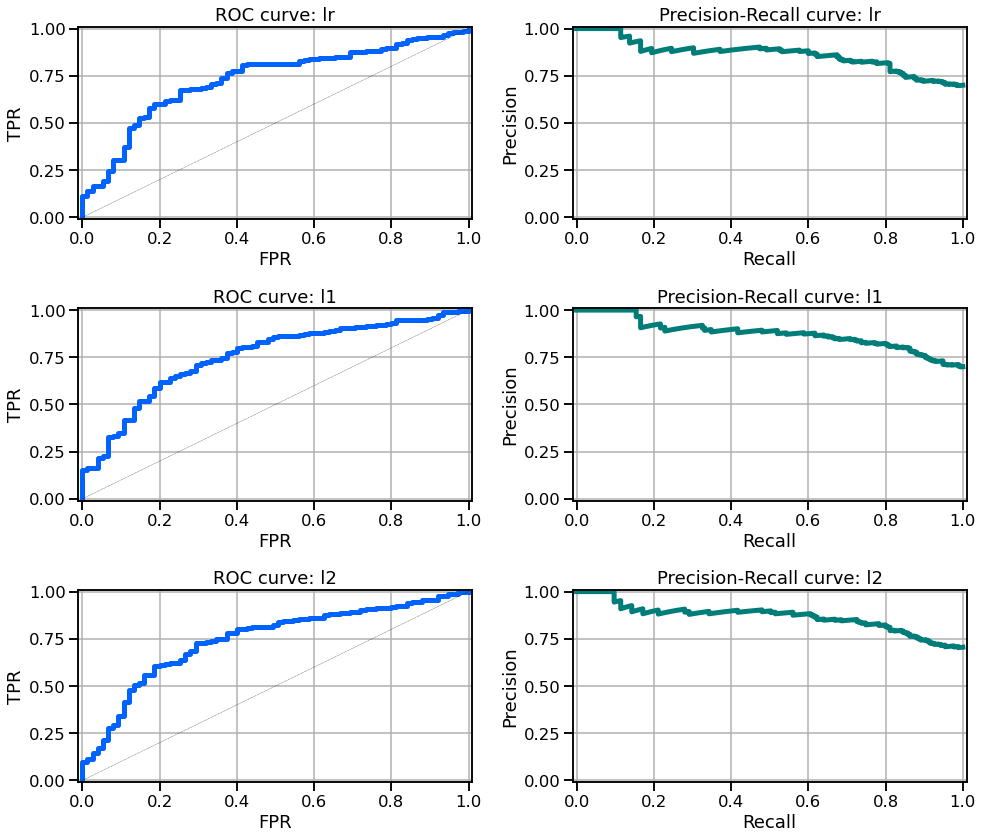

In [56]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')

fig, axList = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(14, 12)

for i, lab in zip(range(3),coeff_labels):

    # Plot the ROC-AUC curve

    ax = axList[i][0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[lab])
    ax.plot(fpr, tpr, color=colors[0], linewidth=5)

    # It is customary to draw a diagonal dotted line in ROC plots.
    # This is to indicate completely random prediction. Deviation from this
    # dotted line towards the upper left corner signifies the power of the model.
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='FPR',
           ylabel='TPR',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve: {}'.format(lab))
    ax.grid(True)

    # Plot the precision-recall curve

    ax = axList[i][1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob[lab])
    ax.plot(recall, precision, color=colors[1], linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve: {}'.format(lab))
    ax.grid(True)

plt.tight_layout()

<a id="summary_log"></a> <br>
# **6. Conclusion and Benefits of the model**
- We have selected 14 features according to feature selection, we are getting maximum accuracy of 76.4% and minimum FPR of 28%
- Lasso zeroes out many coefficients of the hypothesis, whereas ridge does not.
- Ridge implementation outperforms than vanilla and lasso logistic regression, which is clearly reflected in the Metrics section.
- Moreover, the ridge logistic regression gives the minimum FPR among the models which is 28%.
- Polynomial Features i.e. (Credit_amount_duration) helped us to improve the metrics on this dataset for all implementations.

########################################################################################################################################